In [1]:
pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [3]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
#Dealing with missing values

In [6]:
df['type'] = df['type'].fillna('None')
df['genre'] = df['genre'].fillna('None')
df['rating'] = df['rating'].fillna(df['rating'].median())
episode_ = df['episodes'].replace('Unknown', np.nan)
episode_ = episode_.fillna(episode_.median())
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

(-0.5, 211.5, 237.5, -0.5)

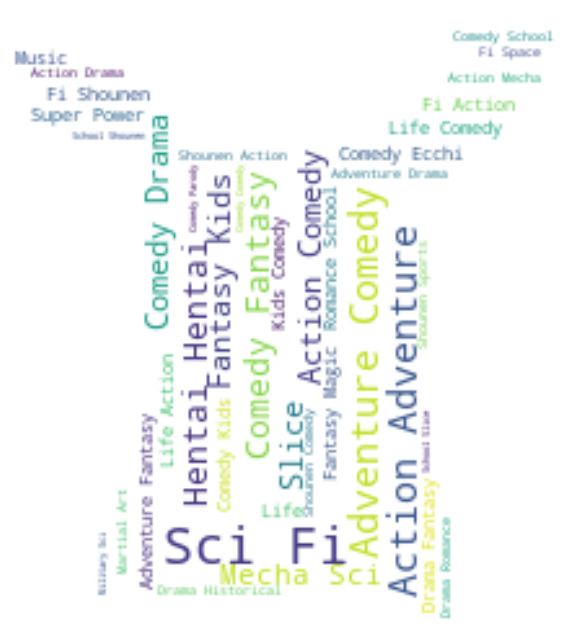

In [8]:
#Famous genres

genre_list = df['genre'].to_string()
pikachu = np.array(Image.open('pikachu.jpg'))
wordcloud = WordCloud(background_color="white", mask=pikachu).generate(genre_list)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Feature processing

In [9]:
type_ = pd.get_dummies(df['type'])
genre_ = df['genre'].str.get_dummies(sep=',')
genre_.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Due to dummy coding, we can see above that the second anime is (at least) an Adventure/Drama/Fantasy type.

In [11]:
X = pd.concat([genre_, type_, episode_, df['rating'], df['members']],axis=1)
X.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Movie,Music,None,ONA,OVA,Special,TV,episodes,rating,members
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,9.37,200630
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,64,9.26,793665
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.25,114262
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,24,9.17,673572
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,51,9.16,151266


In [12]:
#Notice that 'episodes' and 'members' columns contain values much larger than the rest of the dataset, so let's scale our features.

In [13]:
scaled = MaxAbsScaler()
X = scaled.fit_transform(X)

In [14]:
#KNN

recommendations = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(X)
recommendations.kneighbors(X)

(array([[0.00000000e+00, 1.01506549e+00, 1.03095542e+00, ...,
         1.45773221e+00, 1.45854509e+00, 1.45930354e+00],
        [0.00000000e+00, 1.02227158e+00, 1.49378838e+00, ...,
         1.65016556e+00, 1.74844630e+00, 1.78151418e+00],
        [0.00000000e+00, 3.75894154e-02, 4.12559430e-02, ...,
         1.42104554e+00, 1.42183188e+00, 1.42808851e+00],
        ...,
        [0.00000000e+00, 1.66436926e-03, 1.68253094e-03, ...,
         8.07869678e-03, 1.01353307e-02, 1.11230973e-02],
        [0.00000000e+00, 1.00174940e-03, 1.10513608e-03, ...,
         4.01486740e-03, 5.00190620e-03, 5.03023042e-03],
        [0.00000000e+00, 1.00179958e+00, 1.41421365e+00, ...,
         1.41421400e+00, 1.41421404e+00, 1.41421417e+00]]),
 array([[    0,   208,  1494, ...,  5796,  5697,  5805],
        [    1,   200,   268, ...,  6868,   288,   374],
        [    2,     4,     9, ...,   216,   306,  1833],
        ...,
        [12291, 12238, 12237, ..., 12239, 12292, 12231],
        [12292, 12231, 1

In [15]:
anime_indices = recommendations.kneighbors(X)[1] # picks off the array for anime indices


In [16]:
def get_index(x):
    # gives index for the anime
    return df[df['name']==x].index.tolist()[0]

In [17]:
def recommend_me(anime):
    print('Here are 10 anime similar to', anime, ':' '\n')
    index = get_index(anime)
    
    # ignore first entry so as to not return the queried anime as similar to itself
    for i in anime_indices[index][1:]:
            print(df.iloc[i]['name'], 
                  '\n' 'Genre: ', df.iloc[i]['genre'],
                  '\n' 'Episode count: ', df.iloc[i]['episodes'],
                  '\n' 'Rating out of 10:', df.iloc[i]['rating'], '\n')

In [18]:
recommend_me('Death Note')

Here are 10 anime similar to Death Note :

Higurashi no Naku Koro ni Kai 
Genre:  Mystery, Psychological, Supernatural, Thriller 
Episode count:  24 
Rating out of 10: 8.41 

Death Note Rewrite 
Genre:  Mystery, Police, Psychological, Supernatural, Thriller 
Episode count:  2 
Rating out of 10: 7.84 

Jigoku Shoujo Mitsuganae 
Genre:  Mystery, Psychological, Supernatural 
Episode count:  26 
Rating out of 10: 7.81 

Yakushiji Ryouko no Kaiki Jikenbo 
Genre:  Mystery, Police, Supernatural 
Episode count:  13 
Rating out of 10: 7.19 

Saint Luminous Jogakuin 
Genre:  Mystery, Psychological, Supernatural 
Episode count:  13 
Rating out of 10: 6.17 

Boku dake ga Inai Machi 
Genre:  Mystery, Psychological, Seinen, Supernatural 
Episode count:  12 
Rating out of 10: 8.65 

Shiki 
Genre:  Mystery, Supernatural, Thriller, Vampire 
Episode count:  22 
Rating out of 10: 7.99 

Mousou Dairinin 
Genre:  Drama, Mystery, Police, Psychological, Supernatural, Thriller 
Episode count:  13 
Rating out 

Conclusion

Having seen most of these anime, I can attest to the fact that they are similar to Death Note in at least tone/mood.

# Interview Questions:
    
1. Can you explain the difference between user-based and item-based collaborative filtering?

2. What is collaborative filtering, and how does it work?

#1 Answer-
Item based filtering uses similarity between the items to determine whether a user would like it or not, whereas user based finds users with similar consumption patterns as yourself and gives you the content that these similar users found interesting.

#2 Answer-
Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users. Depending on the choices you make, you end up with a type of collaborative filtering approach.